<a href="https://colab.research.google.com/github/Amitsingh994/AIRBNB-EDA-PROJECT/blob/main/Default_of_credit_card_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Default of credit card clients



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Amit kumar singh


# **Project Summary -**

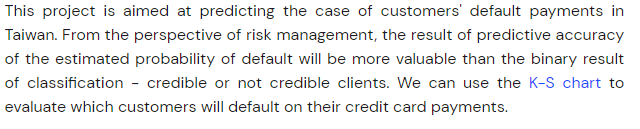

 we are going to see the execution of Credit Card Fraud Detection using State of Taiwan Machine Learning 
The Project aim to analysis and predict he fraud in credit transacti using Machine 
In this project we have use the following model
Projects Learning
Support Vector Machine
- Random Forest
- KNN
- Decision Tree
- Logistic Regression
- Voting Classifier
XGBoost
MLP ANN

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.**

* We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month

* Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

* So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters.

* The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.*

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

from datetime import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn import metrics  


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_path = '/content/default card.csv'


In [ ]:
df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head(10)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.columns

### Dataset Information

In [ ]:
# Dataset Info
df.describe()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.info()

### What did you know about your dataset?

1.we can observe that we have a good number of different data types of numerical data.

2.In total, there are 24 columns and 30000 rows which comprises ample information on which we can perform our in-depth analysis.

3.We can also see from the above, there are No missing NaN values that will require cleaning and handling.


Data Set Characteristics:  Multivariate

Attribute Characteristics:Integer, Real

Missing Values   : N/A

## ***2. Understanding Your Variables***

### Variables Description 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records   (the repayment status)

X7 = the repayment status..........X11 = the repayment status .
 The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement; X13 = amount of bill statement; 


 X17 = amount of bill statement.

X18-X23: Amount of previous payment (NT dollar).

 X18 = amount paid 
 
 X19 = amount paid; . . .;X23 = amount paid .



****

# **Data Analysis**

In [ ]:
#Renaming
df.rename(columns={'default payment next month' : 'default_payment_next_month'},inplace= True )

In [ ]:
from locale import normalize
df['default_payment_next_month'].value_counts(normalize= True)

In [ ]:
sns.countplot(x=df["default_payment_next_month"])

From the above data analysis we can say that

0 - Not Default
1 - Default
Defaulters are less than the Non Defaulters in the given dataset.
*As we can see from above graph that both classes are not in proportion and we have imbalanced dataset. we need to do normalize the data in next step.*

In [ ]:
# Check Unique Values for each variable.
independent_variables = df.columns.tolist()[:-1]
dependent_variable = ['default_payment_next_month']
print(independent_variables)
print(dependent_variable)

# Categorical Features
**We have few categorical features in our dataset that are**

* sex
*education
*marraige
*age
**Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories. These groups may consist of alphabetic (e.g., male, female) or numeric labels (e.g., male = 0, female = 1) that do not contain mathematical information beyond the frequency counts related to group membership.**



**SEX**
* Male
* Female 

In [ ]:
df['SEX'].value_counts()

In [ ]:
sns.countplot(x=df["SEX"])

Number of Male credit holder is less than Female.

**Education**

**1 = graduate school; 2 = university; 3 = high school; 0 = others**

In [ ]:
# counts the education  data set variable data set
df['EDUCATION'].value_counts()

**'EDUCATION' column: notice 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other'.**

In [ ]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

In [ ]:
sns.countplot(x=df["EDUCATION"])

**More number of credit holders are university students followed by Graduates and then High school students**

# **Marriage**

**1 = married; 2 = single; 3 = others**

In [ ]:
# counts the education  data set
df['MARRIAGE'].value_counts()

In [ ]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

df["MARRIAGE"].unique()

In [ ]:
# How many customers had "MARRIAGE" status as 0?

df["MARRIAGE"].value_counts(normalize=True)

**column: what does 0 mean in 'MARRIAGE'?* *Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'**

In [ ]:
# Combine 0 and 3 by changing the value 0 into others

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

In [ ]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(8,5))
sns.countplot(x = 'MARRIAGE', data = df)

**From the above data analysis we can say that**

 **1 - married**
**2 - single**
**3 - others**
**More number of credit cards holder are Single.**

# **AGE**

**Plotting graph of number of ages of all people with credit card irrespective of gender.**

In [ ]:
# counts the education  data set
df['AGE'].value_counts()

In [ ]:
#check the mean of the age group rescpective to the default_payment_next_month
df.groupby('default_payment_next_month')['AGE'].mean()

In [ ]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = df)
plt.show()

**From the above data analysis we can say that**

**We can see more number of credit cards holder age are between 26-30 years old**.

*
**Age above 60 years old rarely uses the credit card**.* 

#**Data Processing**

# **`Numerical features`**



* **Limit Balance**



In [ ]:
# describe  the limit balance  data set
df['LIMIT_BAL'].describe()

In [ ]:
#plotting the dist plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.distplot(df['LIMIT_BAL'], kde=True)
plt.show()

In [ ]:
#plotting the bar plot to vizualize the data distribution
sns.barplot(x='default_payment_next_month', y='LIMIT_BAL', data=df)

**Maximum amount of given credit in NT dollars is 50,000 followed by 30,000 and 20,000.**

# **Credit Card Total Bill Amount**

In [ ]:
#assign the bill amount variable to a single variable 
total_bill_amnt_df = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [ ]:
#plotting the pair plot for bill amount 
sns.pairplot(data = total_bill_amnt_df)

# **Previous payment status**

In [ ]:
df['PAY_0'].value_counts()

**There is some double-digit count of values of the PAY_0 data feature and for some data features also. So we will create one single category of all low categories having less count.**

In [ ]:
fill = (df.PAY_0 == 4) | (df.PAY_0==5) | (df.PAY_0==6) | (df.PAY_0==7) | (df.PAY_0==8)
df.loc[fill,'PAY_0']=4
df.PAY_0.value_counts()

In [ ]:
fill = (df.PAY_2 == 4) | (df.PAY_2 == 1) | (df.PAY_2 == 5) | (df.PAY_2 == 7) | (df.PAY_2 == 6) | (df.PAY_2 == 8)
df.loc[fill,'PAY_2']=4
#df.PAY_2.value_counts()
fill = (df.PAY_3 == 4) | (df.PAY_3 == 1) | (df.PAY_3 == 5) | (df.PAY_3 == 7) | (df.PAY_3 == 6) | (df.PAY_3 == 8)
df.loc[fill,'PAY_3']=4
#df.PAY_3.value_counts()
fill = (df.PAY_4 == 4) | (df.PAY_4 == 1) | (df.PAY_4 == 5) | (df.PAY_4 == 7) | (df.PAY_4 == 6) | (df.PAY_4 == 8)
df.loc[fill,'PAY_4']=4
#df.PAY_4.value_counts()
fill = (df.PAY_5 == 4) | (df.PAY_5 == 7) | (df.PAY_5 == 5) | (df.PAY_5 == 6) | (df.PAY_5 == 8)
df.loc[fill,'PAY_5']=4
#df.PAY_5.value_counts()
fill = (df.PAY_6 == 4) | (df.PAY_6 == 7) | (df.PAY_6 == 5) | (df.PAY_6 == 6) | (df.PAY_6 == 8)
#df.loc[fill,'PAY_6']=4

**when you look at data there are some data features that have values on a large scale like bill_amt variables and many more. So we need to scale that variables**.

# **Bivariate Analysis**
 **It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association**

* **Sex and default_payment_next_month**

In [ ]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'SEX', 'default_payment_next_month'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

 **It is evident from the above graph that the number of defaulter have high proportion of males**

# **Age and default_payment_next_month**

In [ ]:
#plotting the bar plot to vizualize the data distribution related to the default_payment_next_month
plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'default_payment_next_month', data = df)

plt.show()

# **Education and default_payment_next_month**

In [ ]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'EDUCATION', 'default_payment_next_month'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

**above plot it is clear that those people who are other students have higher default payment wrt graduates and university people**

In [ ]:
{column: len(df[column].unique()) for column in df.columns}

# **Correlation**

**correlation of the independent variables with our target(dependent) variable**.

In [ ]:
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# **Predictive Modeling**


**split the training data into train and test using train_test_split()**.

In [ ]:
df = df.drop(["ID"],1)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Check Unique Values for each variable.
independent_variables = df.columns.tolist()[:-1]
dependent_variable = ['default_payment_next_month']
print(independent_variables)
print(dependent_variable)

In [ ]:
X = df[independent_variables]

In [ ]:
Y = df[dependent_variable]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Fitting logistic regression on train data**

**Fit on Train Set**

In [ ]:
df=DecisionTreeClassifier(max_depth=5)
df.fit(X_train, Y_train)
Y_pred=df.predict(X_test)
Y_train_pred=df.predict(X_train)

In [ ]:
df.fit(X_train, Y_train)

# **Predict on Test Set**

In [ ]:
Y_predicted = df.predict(X_test)

In [ ]:
Y_predicted[:10]

In [ ]:
Y_test[:10]

In [ ]:
accuracy_score(Y_test, Y_predicted) * 100


**Measure Accuracy of the Classifier**

# **Confusion Matrix**
**Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
# Obtain accuracy on train set
accuracy_score(Y_train,train_preds)

In [ ]:
# Obtain accuracy on test set
accuracy_score(Y_test,test_preds)

In [ ]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

ROC AUC curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate

False Positive Rate

In [ ]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

In [ ]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

In [ ]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

In [ ]:
#Start with logistic regression model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,Y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

# **Random Forest Classifier Model**

In [ ]:
#Apply Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)
roc=roc_auc_score(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

# **XGBoost Classifier**

In [ ]:
#Apply XGBoost classifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
y_pred =xgb.predict(X_test)
roc=roc_auc_score(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

In [ ]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

**XGBoost classifier model got a higher accuracy of 0.8196.**

# **K-nearest neighbors (kNN)**

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, Y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Fit the model
knn.fit(X_train,Y_train)

In [ ]:
knn.score(X_test,Y_test)

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [ ]:
confusion_matrix(Y_test,Y_pred)

In [ ]:
Y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

# **conclusion**

**XGBoost model has the highest recall, if the business cares recall the most, then this model is the best candidate. If the balance of recall and precision is the most important metric, then Random Forest is the ideal model. Since Random Forest has slightly lower recall but much higher precision than Logistic Regression, I would recommend Random Forest.**

Data categorical variables had minority classes which were added to their closest majority class

There were not huge gap but female clients tended to default the most.

Labels of the data were imbalanced and had a significant difference.

Gradient boost gave the highest accuracy of 82% on test dataset.

Repayment in the month of september tended to be the most important feature for our machine learning model.

The best accuracy is obtained for the Random forest and XGBoost classifier.

In general, all models have comparable accuracy. Nevertheless, because the classes are imbalanced (the proportion of non-default credit cards is higher than default) this metric is misleading.

Furthermore, accuracy does not consider the rate of false positives (non-default credits cards that were predicted as default) and false negatives (default credit cards that were incorrectly predicted as non-default).

Both cases have negative impact on the bank, since false positives leads to unsatisfied customers and false negatives leads to financial loss.

From above table we can see that XGBoost Classifier having Recall, F1-score, and ROC Score values equals 82%, 77%, and 86% and Random forest Classifier having Recall, F1-score, and ROC Score values equals 81%, 75%, and 84%.

